# FINAL PROJECT - PREDICTING THE COMPRESSIVE STRENGTH OF CONCRETE
Can also be found in the following github link:
https://github.com/jacob1713/DTSA-5301/blob/main/Final%20Project_1.ipynb



In [1]:
### IMPORTS ###
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy as sp
import scipy.stats as stats
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
### DATA IMPORT ###
# Import the data
data = pd.read_csv('Concrete_Data.csv')

# Data is from the following link: https://www.kaggle.com/datasets/maajdl/yeh-concret-data


###### EDA ######

In [141]:
# Check the first few rows
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [142]:
# Check the data types
data.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [143]:
# Check the shape
data.shape

(1030, 9)

In [144]:
# Check for missing values
data.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [145]:
# Check the summary statistics
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


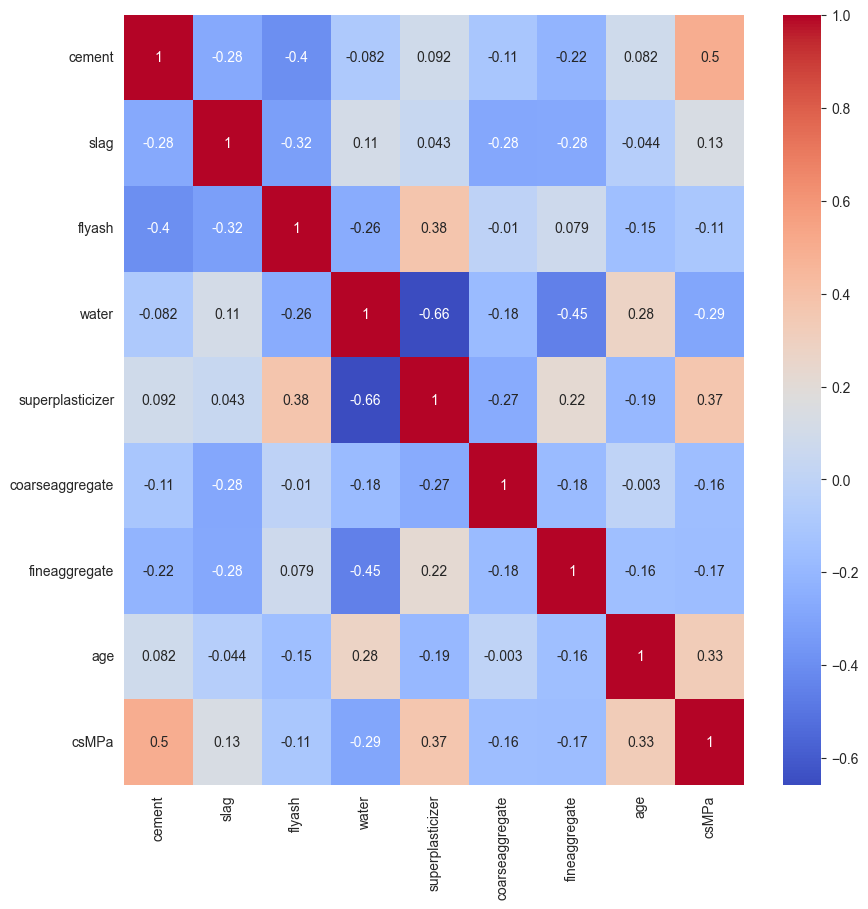

In [146]:
# Create correlation matrix visual
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

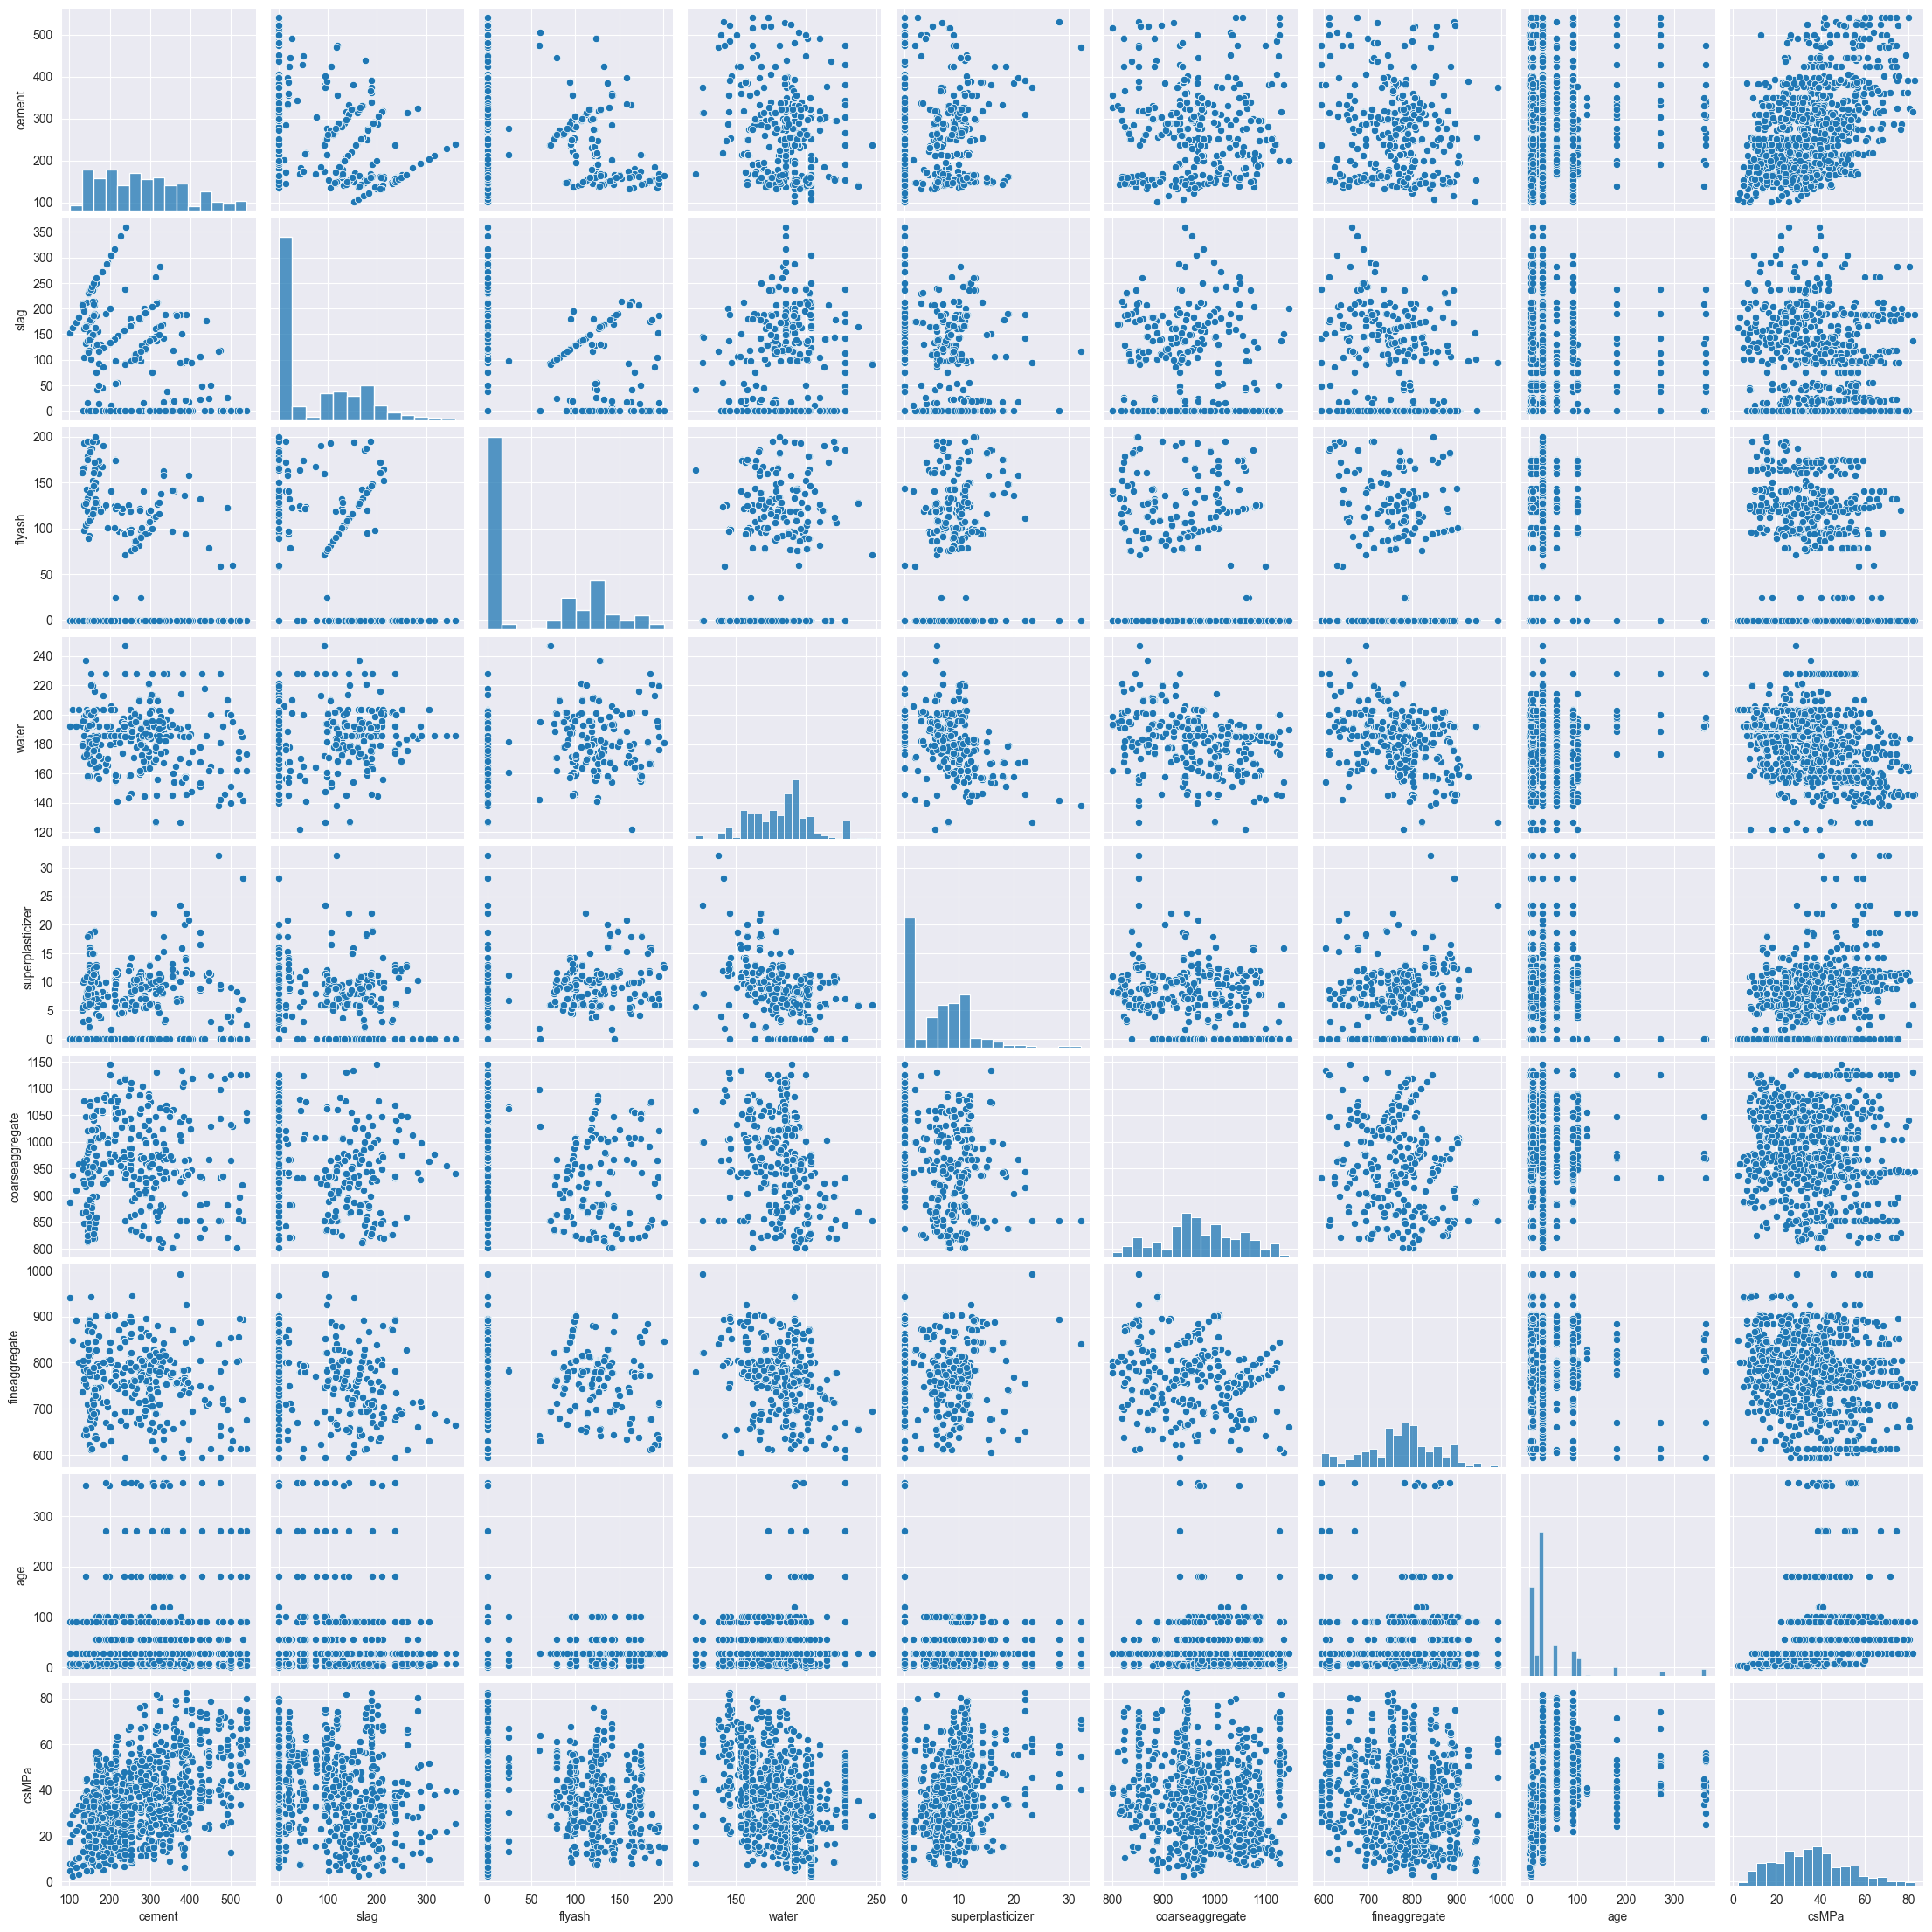

In [147]:
# Create a scatter plot matrix
sns.pairplot(data)
plt.show()

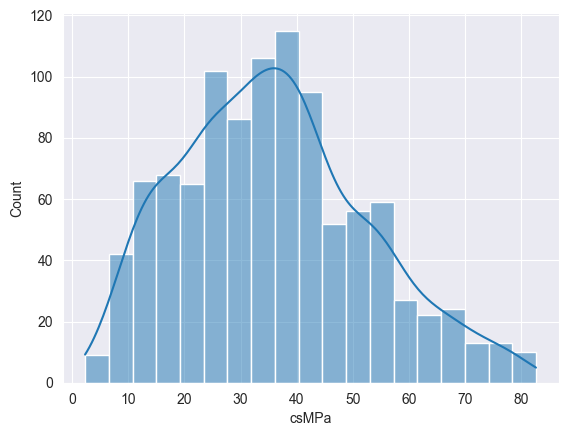

In [148]:
# Check the distribution of the target variable
sns.histplot(data['csMPa'], kde=True)
plt.show()

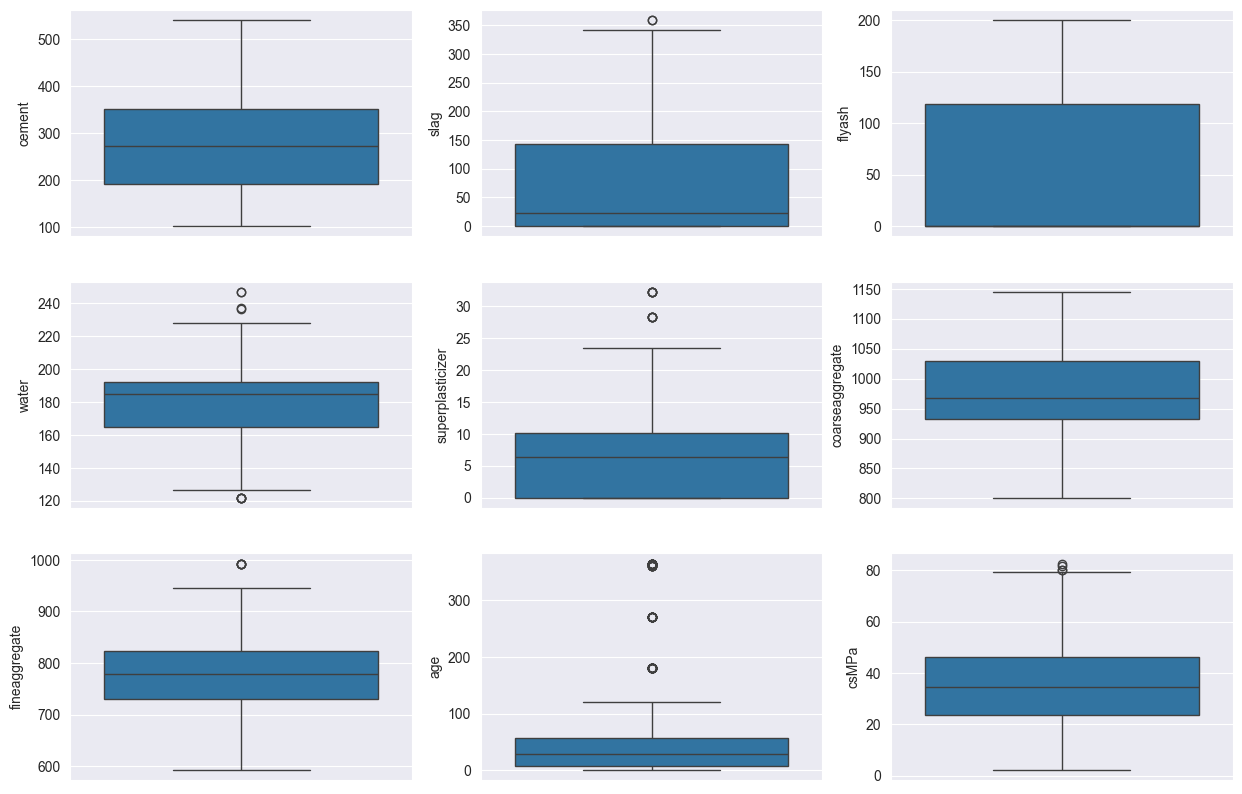

In [149]:
# Check for outliers
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(data['cement'])
plt.subplot(3,3,2)
sns.boxplot(data['slag'])
plt.subplot(3,3,3)
sns.boxplot(data['flyash'])
plt.subplot(3,3,4)
sns.boxplot(data['water'])
plt.subplot(3,3,5)
sns.boxplot(data['superplasticizer'])
plt.subplot(3,3,6)
sns.boxplot(data['coarseaggregate'])
plt.subplot(3,3,7)
sns.boxplot(data['fineaggregate'])
plt.subplot(3,3,8)
sns.boxplot(data['age'])
plt.subplot(3,3,9)
sns.boxplot(data['csMPa'])
plt.show()


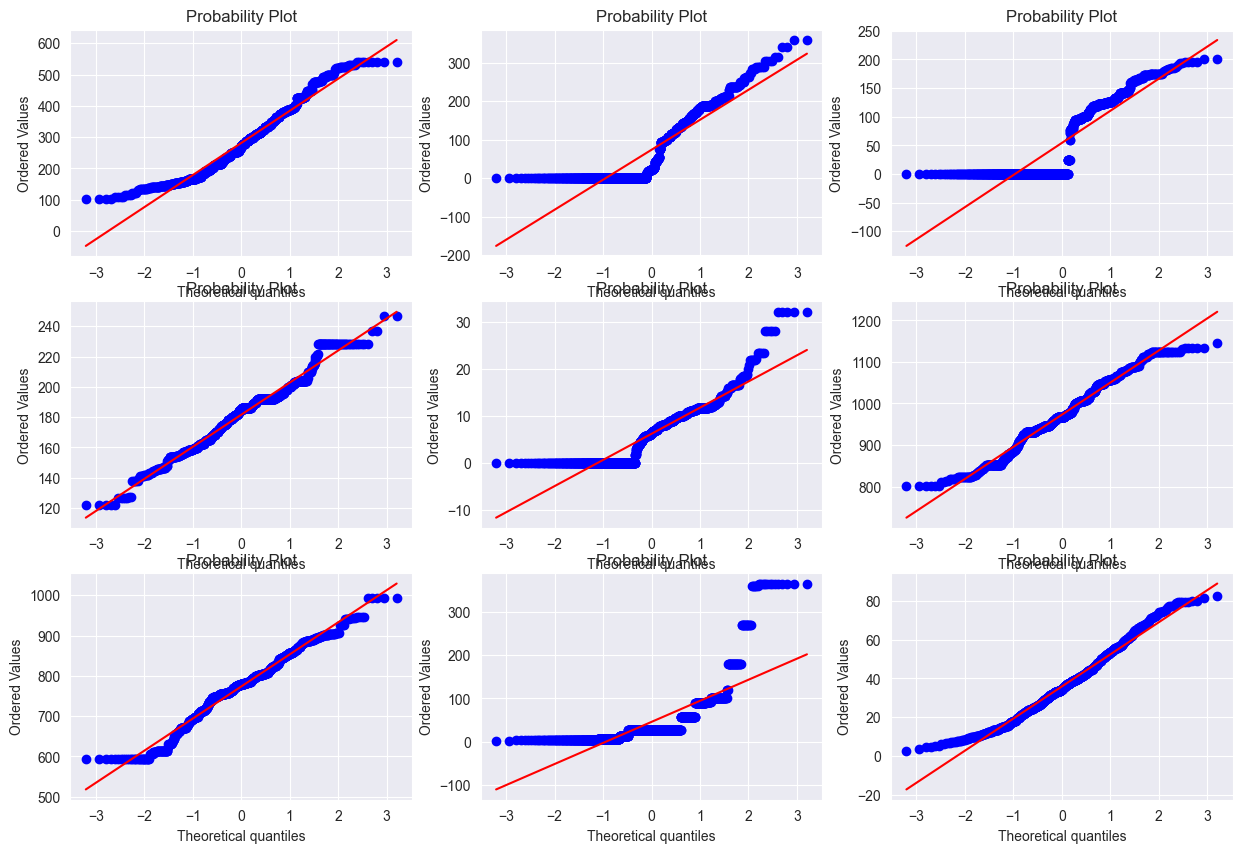

In [150]:
# Check for normality
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
stats.probplot(data['cement'], dist="norm", plot=plt)
plt.subplot(3,3,2)
stats.probplot(data['slag'], dist="norm", plot=plt)
plt.subplot(3,3,3)
stats.probplot(data['flyash'], dist="norm", plot=plt)
plt.subplot(3,3,4)
stats.probplot(data['water'], dist="norm", plot=plt)
plt.subplot(3,3,5)
stats.probplot(data['superplasticizer'], dist="norm", plot=plt)
plt.subplot(3,3,6)
stats.probplot(data['coarseaggregate'], dist="norm", plot=plt)
plt.subplot(3,3,7)
stats.probplot(data['fineaggregate'], dist="norm", plot=plt)
plt.subplot(3,3,8)
stats.probplot(data['age'], dist="norm", plot=plt)
plt.subplot(3,3,9)
stats.probplot(data['csMPa'], dist="norm", plot=plt)
plt.show()

In [151]:
# Check for multicollinearity
# Calculate the VIF
X = data.drop('csMPa', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [1/(1 - sp.stats.pearsonr(X[col], data['csMPa'])[0]**2) for col in X.columns]
vif_data

,feature,VIF
0,cement,1.329498
1,slag,1.018516
2,flyash,1.011311
3,water,1.091569
4,superplasticizer,1.154753
5,coarseaggregate,1.027964
6,fineaggregate,1.028774
7,age,1.121274


In [152]:
# Split the data
X = data.drop('csMPa', axis=1)
y = data['csMPa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


###### LINEAR REGRESSION ######

In [182]:
# Create a linear regression model

predictors = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']

def calculate_adjusted_r2(X, y):
    """Calculates the adjusted R² for a given set of predictors."""
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()  # Fit the model
    return model.rsquared_adj  # Return adjusted R²

def evaluate_model(X_train, y_train, X_test, y_test):
    """Evaluates the model on the test set."""
    X_train = sm.add_constant(X_train)  # Add constant to training predictors
    model = sm.OLS(y_train, X_train).fit()  # Fit the model on training data
    X_test = sm.add_constant(X_test)  # Add constant to testing predictors
    predictions = model.predict(X_test)  # Generate predictions on test set
    adjusted_r2 = 1 - (1 - model.rsquared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    return adjusted_r2

best_adjusted_r2 = -np.inf
best_combination = None

# Loop through combinations of predictors
for r in range(1, len(predictors) + 1):
    for combo in combinations(predictors, r):
        X_combo_train = X_train[list(combo)]
        adjusted_r2 = evaluate_model(X_combo_train, y_train, X_test[list(combo)], y_test)
        if adjusted_r2 > best_adjusted_r2:
            best_adjusted_r2 = adjusted_r2
            best_combination = combo

print("Best combination of predictors:", best_combination)
print("Highest Adjusted R²:", best_adjusted_r2)

# Create a linear regression model
X_train_best = X_train[list(best_combination)]
X_test_best = X_test[list(best_combination)]
X_train_best = sm.add_constant(X_train_best)
model = sm.OLS(y_train, X_train_best).fit()

# Print the model summary
print(model.summary())

# Generate predictions
X_test_best = sm.add_constant(X_test_best)
predictions = model.predict(X_test_best)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate the R² score
r2 = r2_score(y_test, predictions)
print("R² Score:", r2)

# Store the results
results = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Mean Squared Error': [mse],
    'R² Score': [r2]
})

Best combination of predictors: ('cement', 'slag', 'flyash', 'water', 'superplasticizer', 'age')
Highest Adjusted R²: 0.6186189116854109
                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     233.5
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          2.23e-173
Time:                        08:34:57   Log-Likelihood:                -3083.3
No. Observations:                 824   AIC:                             6181.
Df Residuals:                     817   BIC:                             6214.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025 

In [185]:
# Create a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=40)

# Specify the hyperparameter space
param_grid = {
    'max_depth': [16],
    'min_samples_split': np.arange(2, 10).tolist(),
    'min_samples_leaf': np.arange(1, 10).tolist()
}

# Perform grid search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_dt = grid_search.best_estimator_

# Evaluate the model
y_pred = best_dt.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)  
print("R² Score:", r2)

# Store the results
new_results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Mean Squared Error': [mse],
    'R² Score': [r2]
})

# Concatenate the results
results = pd.concat([results, new_results], ignore_index=True)


Best hyperparameters: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 3}
Mean Squared Error: 46.947721405609485
R² Score: 0.8205824408520086


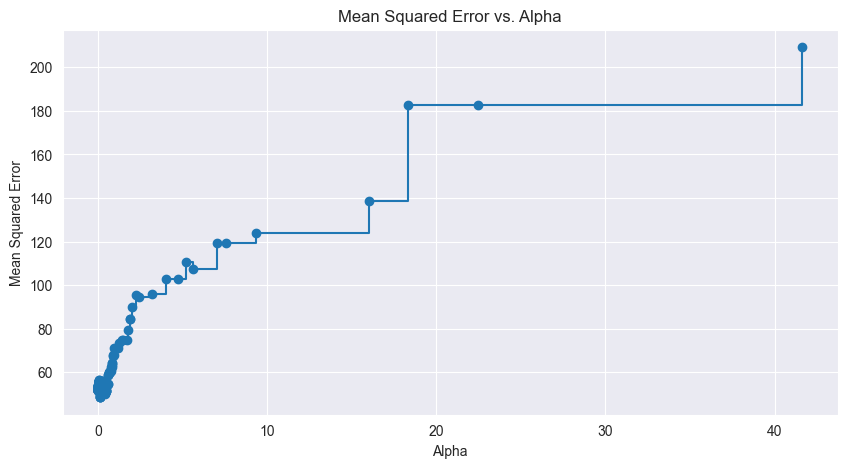

Best Alpha: 0.13646655879180236
Mean Squared Error: 48.59698859523413
R² Score: 0.8142795259354614


In [186]:
# Implement minimal cost complexity pruning
path = best_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a list of DecisionTreeRegressor models
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=40, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)
    
# Remove the last model
models = models[:-1]
ccp_alphas = ccp_alphas[:-1]

# Calculate the mean squared error for each model
mse_values = [mean_squared_error(y_test, model.predict(X_test)) for model in models]

# Plot the mean squared error as a function of alpha
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, mse_values, marker='o', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs. Alpha")
plt.show()

# Get the best model
best_model = models[np.argmin(mse_values)]
best_alpha = ccp_alphas[np.argmin(mse_values)]
print("Best Alpha:", best_alpha)

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Store the results
new_results = pd.DataFrame({
    'Model': ['Decision Tree (Pruned)'],
    'Mean Squared Error': [mse],
    'R² Score': [r2]
})

# Concatenate the results
results = pd.concat([results, new_results], ignore_index=True)

In [187]:
# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=40)

# Specify the hyperparameter space
param_grid = {
    'n_estimators': [250],
    #'max_depth': np.arange(1, 10).tolist(),
    'min_samples_split': np.arange(2, 10).tolist(),
    'min_samples_leaf': np.arange(1, 10).tolist()
}

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the model
y_pred = best_rf.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Store the results
new_results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Mean Squared Error': [mse],
    'R² Score': [r2]
})

# Concatenate the results
results = pd.concat([results, new_results], ignore_index=True)

Best hyperparameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Mean Squared Error: 29.323023191568186
R² Score: 0.8879377935636618


In [188]:
# Create a Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=40, min_samples_split=8)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Specify the hyperparameter space
param_grid = {
    'n_estimators': [225],
    'max_depth': np.arange(1, 7).tolist(),
    'min_samples_split': np.arange(2, 10).tolist(),
    #'min_samples_leaf': np.arange(1, 10).tolist(),
}

# Perform grid search
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_gb = grid_search.best_estimator_

# Evaluate the model
y_pred = best_gb.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Store the results
new_results = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'Mean Squared Error': [mse],
    'R² Score': [r2]
})

# Concatenate the results
results = pd.concat([results, new_results], ignore_index=True)

Best hyperparameters: {'max_depth': 4, 'min_samples_split': 9, 'n_estimators': 225}
Mean Squared Error: 23.07627877848909
R² Score: 0.9118106376902797


In [189]:
# Create a Support Vector Regressor
svr = SVR(kernel='rbf')

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Specify the hyperparameter space
param_grid = {
    'C': [0.1, 1, 10, 20],
    'epsilon': [0.5, 0.2, 0.1, 0.01, 0.001],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Perform grid search
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_svr = grid_search.best_estimator_

# Evaluate the model
y_pred = best_svr.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Store the results
new_results = pd.DataFrame({
    'Model': ['Support Vector'],
    'Mean Squared Error': [mse],
    'R² Score': [r2]
})

# Concatenate the results
results = pd.concat([results, new_results], ignore_index=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'C': 20, 'epsilon': 0.5, 'gamma': 'scale'}
Mean Squared Error: 43.68244457875745
R² Score: 0.8330611721019195


In [190]:
# Compare the models
results

,Model,Mean Squared Error,R² Score
0,Linear Regression,123.567853,0.527767
1,Decision Tree,46.947721,0.820582
2,Decision Tree (Pruned),48.596989,0.814280
3,Random Forest,29.323023,0.887938
4,Gradient Boosting,23.076279,0.911811
5,Support Vector,43.682445,0.833061


CONCLUSION:

Using the concrete data, we have built several regression models to predict the compressive strength of concrete. The models we built are as follows:

1. Linear Regression
2. Decision Tree
3. Decision Tree (Pruned)
4. Random Forest
5. Gradient Boosting
6. Support Vector

The Gradient Boosting model performed the best and gave us a highly accurate model that could be deployed to predict the compressive strength of concrete. The model had a mean squared error of 23.07 and an R² score of 0.91. This model can be used to predict the compressive strength of concrete based on the given features. This model could be deployed by a concrete business to make predictions about the compressive strength of concrete based on the mix of materials used.
